In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

### 1-2. reading file and getting descriptive statistics

In [100]:
url = 'https://drive.google.com/file/d/1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1/view?usp=sharing'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)

In [101]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [103]:
df.columns = df.columns.str.lower()

In [104]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### 3. correlations

Text(0.5, 1.0, 'Тепловая матрица корреляции между количественными признаками')

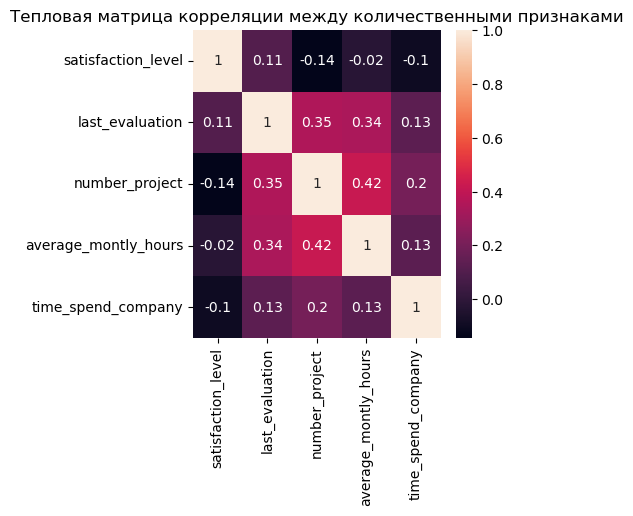

In [105]:
plt.figure(figsize=[4,4])
sns.heatmap(df.iloc[:,:5].corr('pearson'), annot=True)
plt.title('Тепловая матрица корреляции между количественными признаками')

<Axes: >

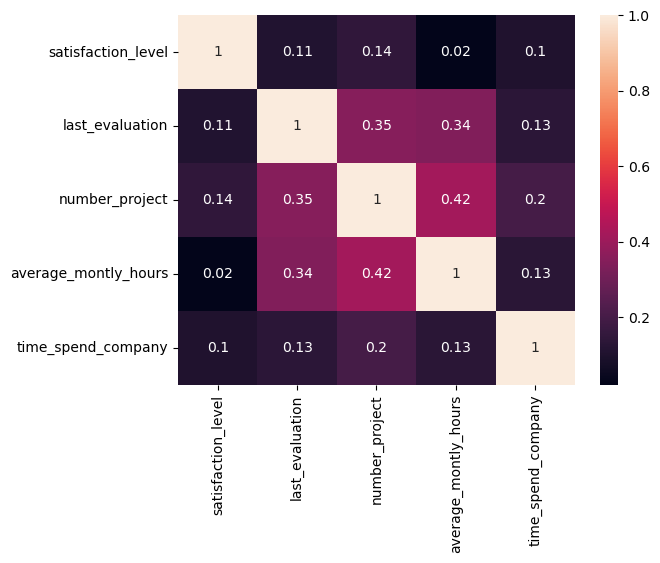

In [106]:
sns.heatmap(df.iloc[:, :5].corr('pearson').abs(), annot=True)

In [107]:
correlations = df.iloc[:,:5].corr('pearson').abs()
for i in range(len(correlations)):
    correlations.iloc[i,i] = np.nan

In [108]:
max_corr_pairs = pd.DataFrame(correlations.idxmax()[0:2]).reset_index()
max_corr_pairs.columns = ['col_1', 'col_2']
max_corr_pairs['coef'] = [i for i in correlations.abs().max().sort_values(ascending=False).unique()[0:2]]
max_corr_pairs

,col_1,col_2,coef
0,satisfaction_level,number_project,0.417211
1,last_evaluation,number_project,0.349333


мы видим, что наибольший коэффицент корреляции имеют следующие пары:
1. number_project и average_montly_hours (0.417211)
2. last_evaluation и number_project (0.349333)

In [109]:
min_corr_pairs = pd.DataFrame(correlations.idxmin()[0:2]).reset_index()
min_corr_pairs.columns = ['col_1', 'col_2']
min_corr_pairs['coef'] = [i for i in correlations.abs().min()[0:2]]
min_corr_pairs

,col_1,col_2,coef
0,satisfaction_level,average_montly_hours,0.020048
1,last_evaluation,satisfaction_level,0.105021


наименьший коэффициент корреляции имеют следующие пары:
1. satisfaction_level и average_montly_hours (0.020048)
2. last_evaluation и satisfaction_level (0.105021)

### 4. number of employees in the department

In [110]:
df.groupby('department').agg('count')['satisfaction_level']

department
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
Name: satisfaction_level, dtype: int64

### 5-6. salary distribution

Text(0, 0.5, 'Количество сотрудников')

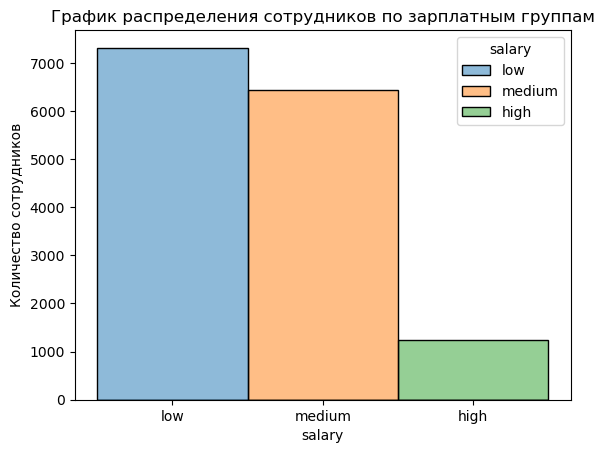

In [111]:
sns.histplot(data = df, x = 'salary', bins=3, hue = 'salary')
plt.title('График распределения сотрудников по зарплатным группам')
plt.ylabel('Количество сотрудников')

Text(0, 0.5, 'Количество сотрудников')

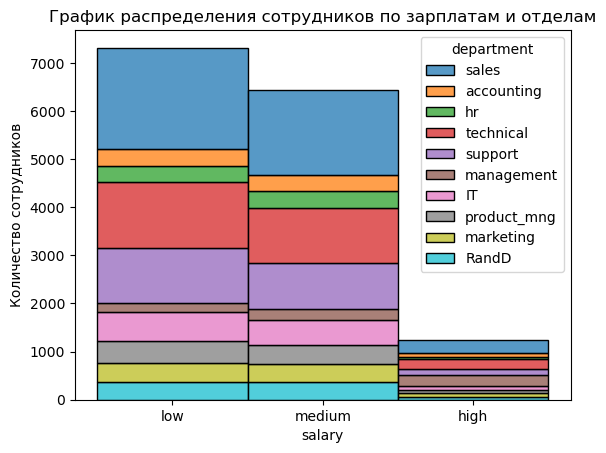

In [112]:
sns.histplot(data = df, x = 'salary', bins=3, hue = 'department', multiple='stack')
plt.title('График распределения сотрудников по зарплатам и отделам')
plt.ylabel('Количество сотрудников')

Text(0, 0.5, 'Количество сотрудников')

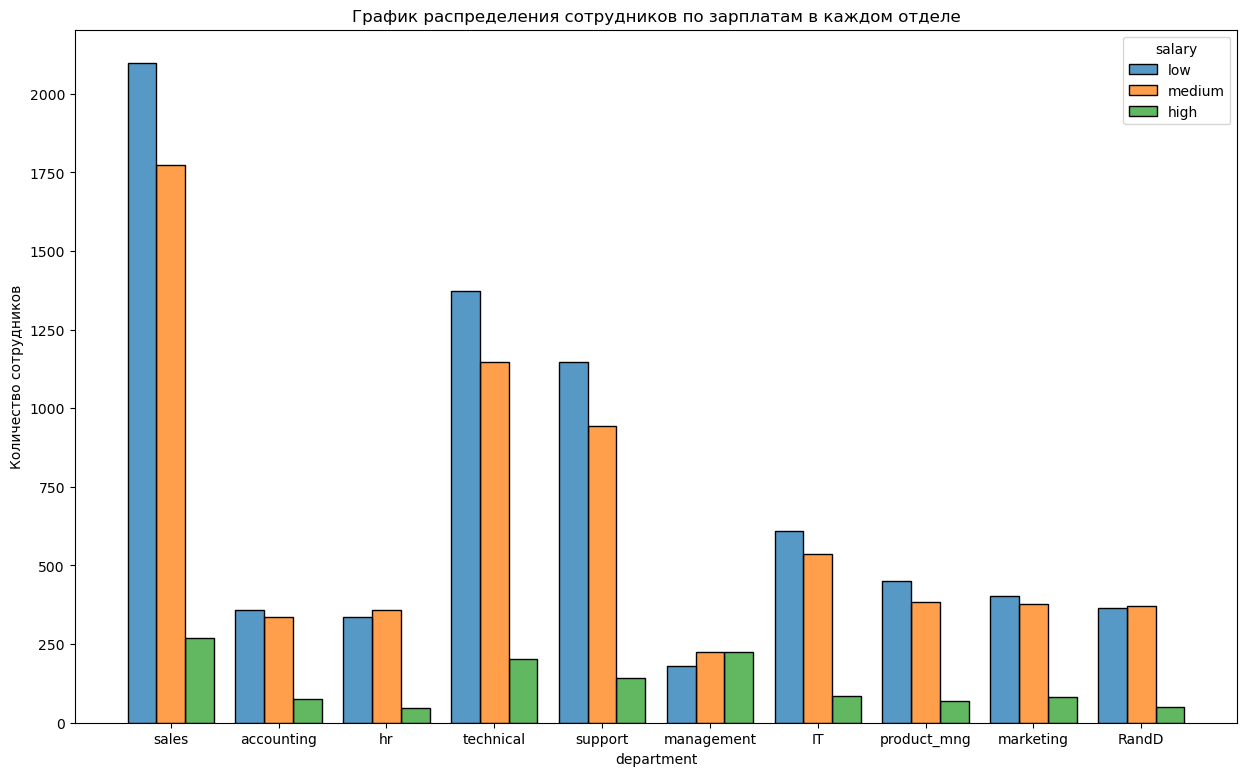

In [113]:
plt.figure(figsize=[15,9])
sns.histplot(data = df, x = 'department', hue = 'salary', multiple='dodge', shrink=0.8)
plt.title('График распределения сотрудников по зарплатам в каждом отделе')
plt.ylabel('Количество сотрудников')

array([[<Axes: title={'center': 'IT'}>,
        <Axes: title={'center': 'RandD'}>,
        <Axes: title={'center': 'accounting'}>],
       [<Axes: title={'center': 'hr'}>,
        <Axes: title={'center': 'management'}>,
        <Axes: title={'center': 'marketing'}>],
       [<Axes: title={'center': 'product_mng'}>,
        <Axes: title={'center': 'sales'}>,
        <Axes: title={'center': 'support'}>],
       [<Axes: title={'center': 'technical'}>, <Axes: >, <Axes: >]],
      dtype=object)

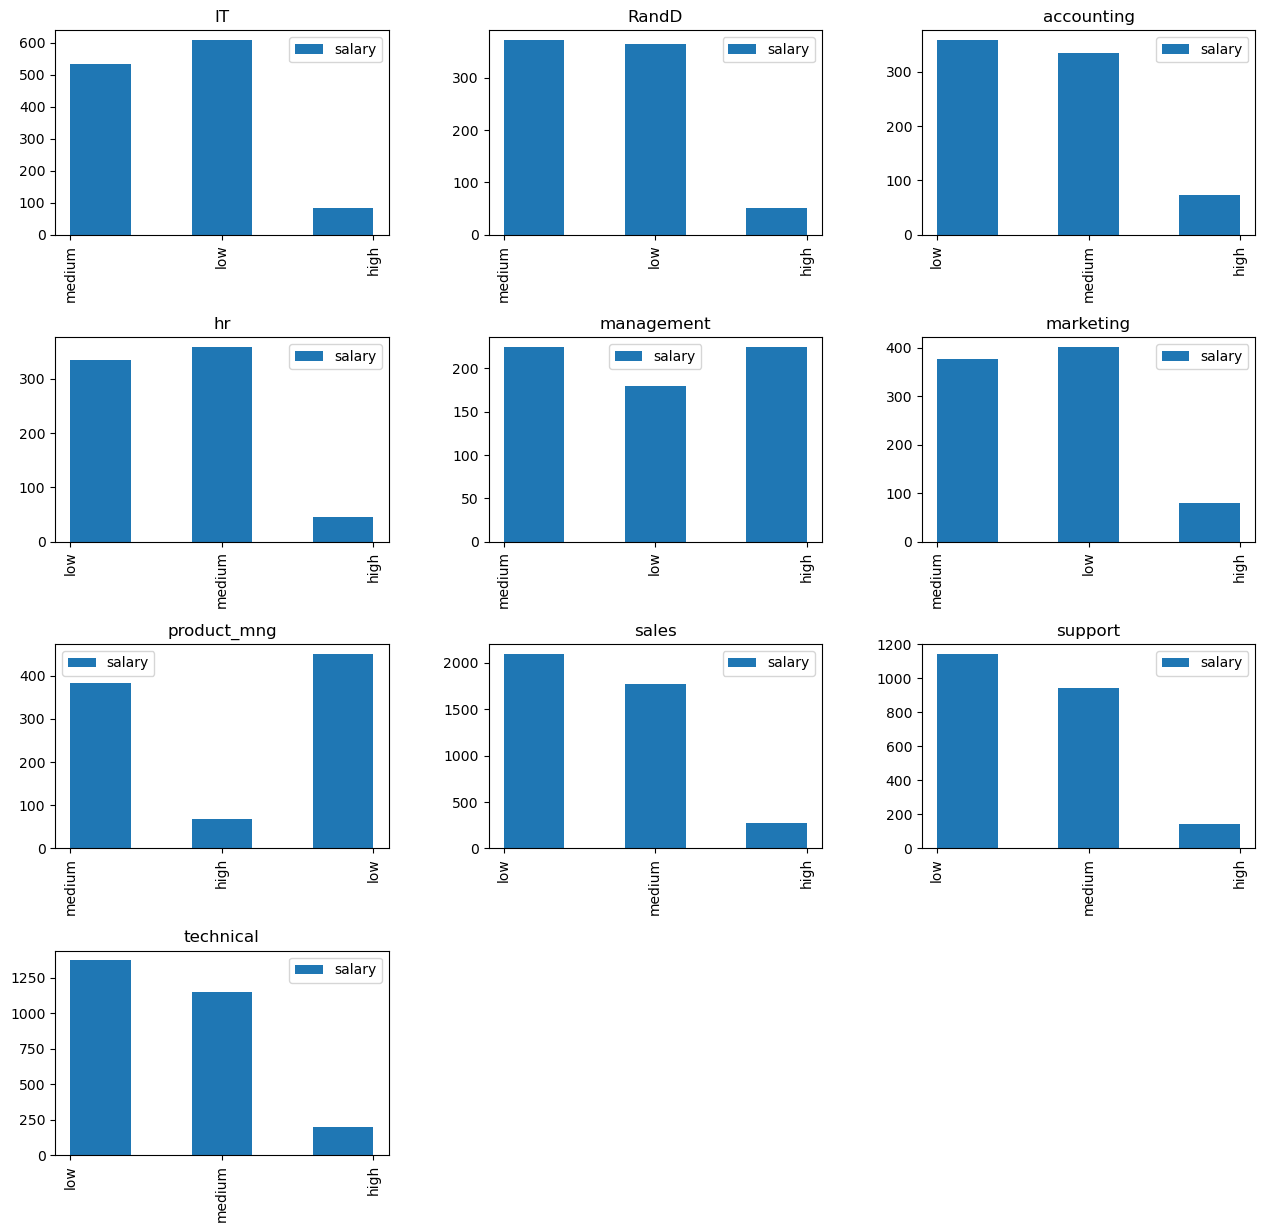

In [114]:
df.hist('salary', 'department',
        bins = 5, 
        figsize = (15,15),
        legend = True,
        layout = (-1, 3)
        )

### 7. statistical testing

перед реализацией стат теста рассмотрим распределения, построим графики, проверим распределения на нормальность, подберем соответствующий стат тест

In [115]:
from scipy.stats import shapiro

In [116]:
df.loc[df.salary == 'high']['average_montly_hours'].describe()

count    1237.000000
mean      199.867421
std        47.710446
min        96.000000
25%       161.000000
50%       199.000000
75%       241.000000
max       307.000000
Name: average_montly_hours, dtype: float64

<Axes: xlabel='average_montly_hours', ylabel='Count'>

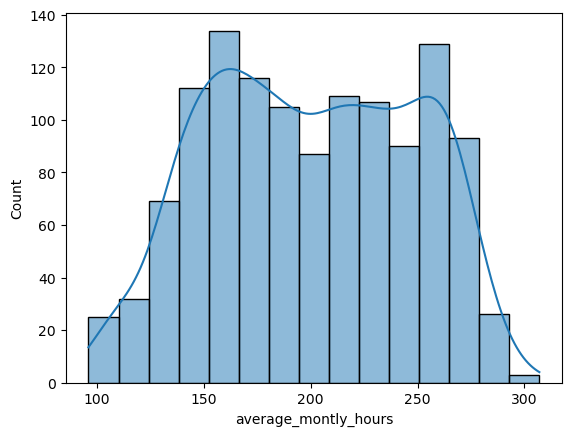

In [117]:
sns.histplot(data = df.loc[df.salary == 'high'], x = 'average_montly_hours', kde = True)

чисто визуально график распределения среднего значения отработанных часов сотрудниками с высоким окладом не имеет нормальное распределение, так как имеются две вершины

In [118]:
df.loc[df.salary == 'low']['average_montly_hours'].describe()

count    7316.000000
mean      200.996583
std        50.832214
min        96.000000
25%       155.000000
50%       199.000000
75%       246.000000
max       310.000000
Name: average_montly_hours, dtype: float64

<Axes: xlabel='average_montly_hours', ylabel='Count'>

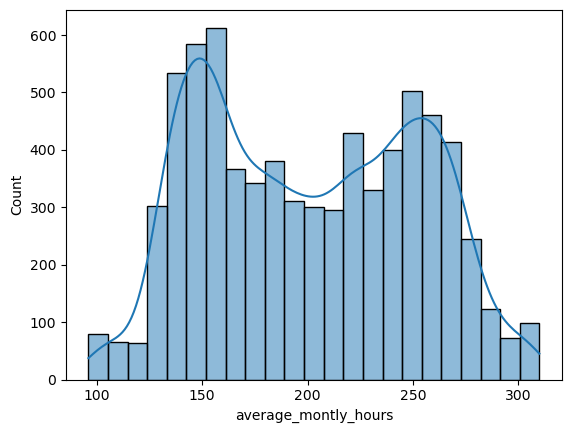

In [119]:
sns.histplot(df.loc[df.salary == 'low']['average_montly_hours'], kde = True)

чисто визуально график распределения среднего значения отработанных часов сотрудниками с низким окладом не имеет нормальное распределение, так как имеются две вершины

<Axes: xlabel='average_montly_hours', ylabel='Density'>

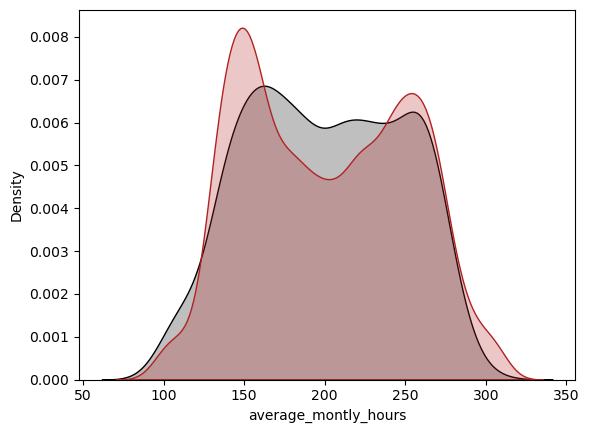

In [120]:
sns.kdeplot(df.loc[df.salary == 'high']['average_montly_hours'], label = 'high', fill = True, color = '#000000')
sns.kdeplot(df.loc[df.salary == 'low']['average_montly_hours'], label = 'low', fill = True, color = '#B22222')

In [121]:
df.loc[df.salary != 'medium'].groupby('salary')['average_montly_hours'].sum().reset_index()

,salary,average_montly_hours
0,high,247236
1,low,1470491


In [122]:
def shapiro_test(data: pd.Series, alpha: int = 0.05):
    shapiro_coef = shapiro(data)
    if shapiro_coef.pvalue > alpha:
        return 'Распределение, вероятно, нормальное'
    else:
        return f'Распределение, вероятно, отличается от нормального: p-value = {shapiro_coef.pvalue}  coef = {shapiro_coef.statistic}'
    


In [123]:
shapiro_test(df.loc[df.salary == 'high']['average_montly_hours'], 0.05)

'Распределение, вероятно, отличается от нормального: p-value = 5.604931784946058e-15  coef = 0.9712138175964355'

In [124]:
shapiro_test(df.loc[df.salary == 'low']['average_montly_hours'], 0.05)

c:\Users\Admin\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


'Распределение, вероятно, отличается от нормального: p-value = 7.01181725578852e-41  coef = 0.9598619937896729'

мы имеем количественную переменную, распределения значений групп отличаются от нормальных, группы не связаны - используем Mann-Whitney U rank test

In [125]:
from scipy.stats import mannwhitneyu

mann_test = mannwhitneyu(
    df.loc[df.salary == 'high']['average_montly_hours'],
    df.loc[df.salary == 'low']['average_montly_hours']
)

print(f'p-value = {mann_test.pvalue}')
print(f'coef = {mann_test.statistic}')

if mann_test.pvalue < 0.05:
    print('Отвергаем нулевую гипотезу, распределения, вероятно, различные')
else:
    print('Принимаем нулевую гипотезу, распределения, вероятно, одинаковые')

p-value = 0.8241330720858693
coef = 4507096.5
Принимаем нулевую гипотезу, распределения, вероятно, одинаковые


результат теста говорит о том, что у нас нет достаточных доказательств, чтобы сказать, что есть статистически значимая разница между средним количеством рабочих часов у сотрудников с большим и маленьким окладами

### stats for resigned employees and remaining employees

In [126]:
resigned_employees = df.loc[df.left == 1]
remaining_employees = df.loc[df.left == 0]

доля сотрудников с повышением

In [127]:
#процент числа повышенных за последние 5 лет сотрудников из числа уволившихся от общего числа уволившихся сотрудников 
resigned_employees['promotion_last_5years'].mean()

0.005320638476617194

In [128]:
#процент числа повышенных за последние 5 лет сотрудников из числа текущих от общего числа текущих сотрудников 
remaining_employees['promotion_last_5years'].mean()

0.026251312565628283

In [129]:
df.groupby('left')['promotion_last_5years'].mean()

left
0    0.026251
1    0.005321
Name: promotion_last_5years, dtype: float64

In [130]:
#общее количество повышенных за поледние 5 лет среди текущих и среди уволившихся
df.groupby('left')['promotion_last_5years'].sum()

left
0    300
1     19
Name: promotion_last_5years, dtype: int64

In [131]:
#общее число текущих и уволившихся сотрудников
df.groupby('left')['promotion_last_5years'].count()

left
0    11428
1     3571
Name: promotion_last_5years, dtype: int64

In [132]:
def promotions(data: pd.DataFrame = df):
    prom = df.groupby('left')[['promotion_last_5years']].mean().round(3) * 100
    prom.rename(columns = {'promotion_last_5years': '% повышений'}, index = {0: 'оставшиеся', 1: 'ушедшие'}, inplace = True)
    print(prom)

In [133]:
promotions(df)

            % повышений
left                   
оставшиеся          2.6
ушедшие             0.5


средняя степень удовлетворенности

In [134]:
#средняя степерь удовлетворенности для текущих сотрудников
remaining_employees['satisfaction_level'].mean()

0.666809590479524

In [135]:
#средняя степерь удовлетворенности для уволившихся сотрудников
resigned_employees['satisfaction_level'].mean()

0.4400980117614114

In [136]:
def satisfaction(data: pd.DataFrame = df):
    sat = df.groupby('left')[['satisfaction_level']].mean().round(3) * 100
    sat.rename(columns = {'satisfaction_level': '% удовлетворенности'}, index = {0: 'оставшиеся', 1: 'ушедшие'}, inplace = True)
    print(sat)

In [137]:
satisfaction(df)

            % удовлетворенности
left                           
оставшиеся                 66.7
ушедшие                    44.0


среднее количество проектов

In [138]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [139]:
#среднее количество проектов текущих сотрудников по времени, проведенному в компании
remaining_employees.groupby('time_spend_company')['number_project'].mean()

time_spend_company
2     3.681291
3     3.729463
4     3.916017
5     4.206250
6     4.064833
7     3.851064
8     3.777778
10    3.682243
Name: number_project, dtype: float64

In [140]:
#среднее количество проектов текущих сотрудников
remaining_employees['number_project'].mean()

3.786664333216661

In [141]:
#среднее количество проектов уволившихся сотрудников
resigned_employees.groupby('time_spend_company')['number_project'].mean()

time_spend_company
2    4.056604
3    2.097730
4    5.960674
5    4.759904
6    4.574163
Name: number_project, dtype: float64

In [142]:
#среднее количество проектов уволившихся сотрудников
resigned_employees['number_project'].mean()

3.8555026603192384

In [143]:
df['number_project']

0        2
1        5
2        7
3        5
4        2
        ..
14994    2
14995    2
14996    2
14997    6
14998    2
Name: number_project, Length: 14999, dtype: int64

In [144]:
def projects_num(data: pd.DataFrame = df):
    projects = df.groupby(['left', 'time_spend_company'])[['number_project']].mean().round(3)
    projects.rename(columns = {'number_project': 'кол-во проектов'}, index = {0: 'оставшиеся', 1: 'ушедшие'}, inplace = True)
    print(projects) 

In [145]:
projects_num()

                               кол-во проектов
left       time_spend_company                 
оставшиеся 2                             3.681
           3                             3.729
           4                             3.916
           5                             4.206
           6                             4.065
           7                             3.851
           8                             3.778
           10                            3.682
ушедшие    2                             4.057
           3                             2.098
           4                             5.961
           5                             4.760
           6                             4.574


In [146]:
def get_info(data: pd.DataFrame = df):
    '''
    Функция для получения информации о текущих и уволившихся сотрудниках:
    'pp' выводит информацию о проценте повышений среди уволившихся и оставшихся сотрудников
    'sat' выводит информацию о средней степени удовлетворенности
    'prod' выводит информацию о среднем количестве проектов
    'q' выходит из программы
    '''
    dic = { 'pp': promotions, 'sat': satisfaction, 'prod': projects_num}
    info_type = input('введите команду')
    while info_type != 'q':
        dic[info_type]()
        info_type = input('введите команду')
    else:
        print('see ya')


In [147]:
get_info()

see ya


### LDA

In [148]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

перед реализацией выстроим план доп действий: 
1. посмотрим наличие мультиколлинеарности
2. закодировать номинальные признаки (work_accident, promotion_last_5years)
3. в рамках реализации проверим необходимость отбора предикторов для более качественной работы модели
4. проведем масштабирование и/или нормализацию предикторов, если потребуется

In [219]:
binary_list = [col for col in df.drop(['left', 'salary', 'department'], axis = 1) if df[col].min() == 0 and df[col].max() == 1]
not_binary_list = [col for col in df.drop(['left', 'salary', 'department'], axis = 1) if df[col].min() != 0 or df[col].max() != 1]

print(binary_list)
print(not_binary_list)

['work_accident', 'promotion_last_5years']
['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']


распределение бинарных признаков

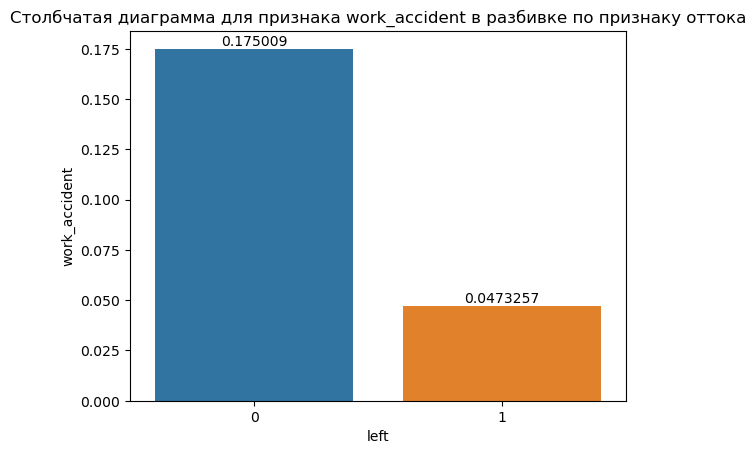

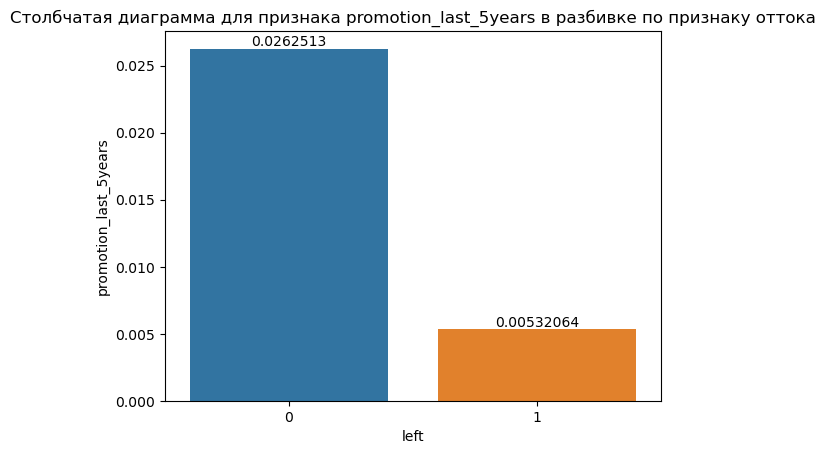

In [221]:
for col in binary_list:
    ax = sns.barplot(df,  x='left', y=col, errorbar=None)
    plt.title(f'Столбчатая диаграмма для признака {col} в разбивке по признаку оттока')
    ax.bar_label(ax.containers[0])
    plt.show()

графики распределений небинарных признаков

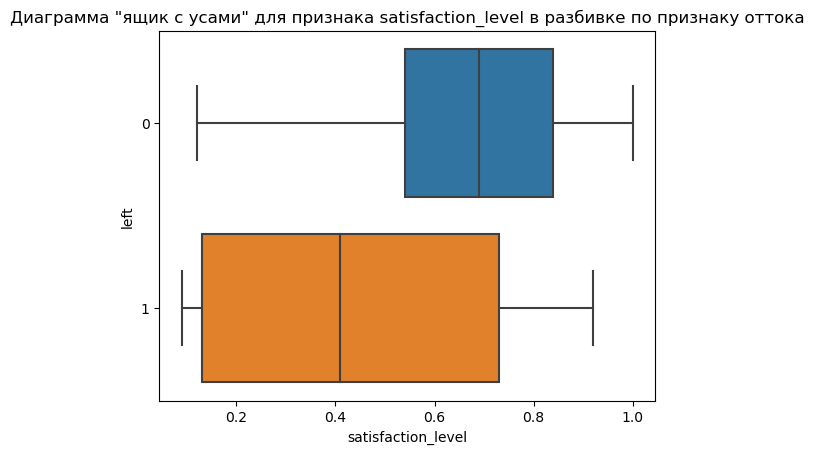

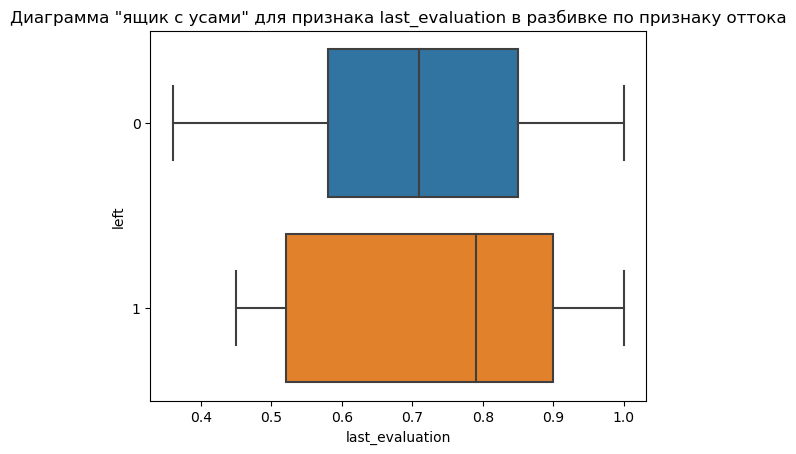

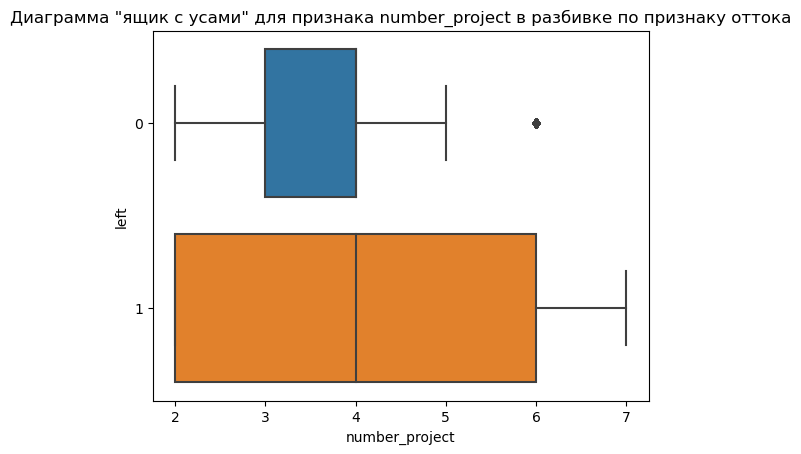

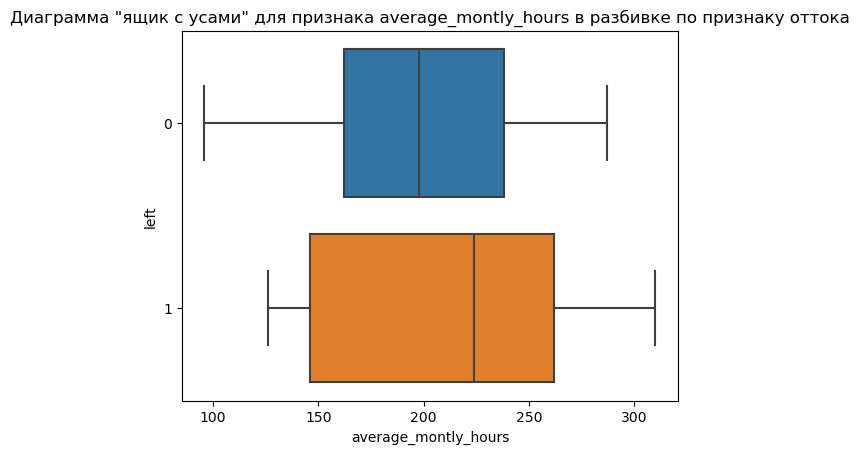

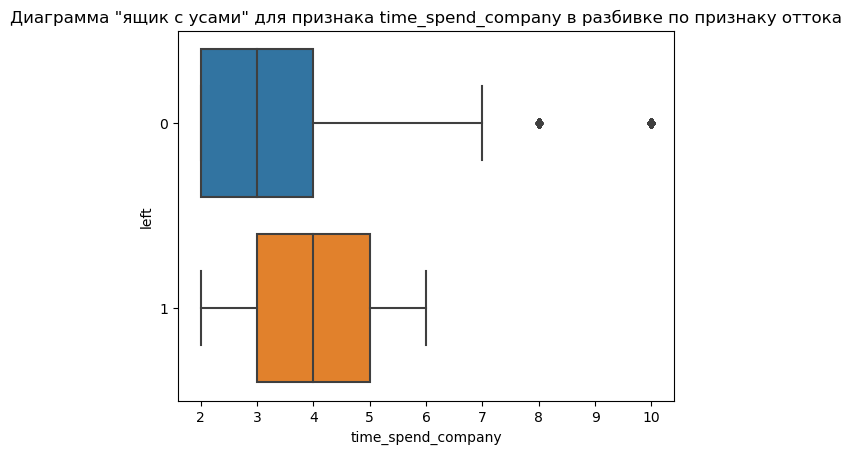

In [222]:
for col in not_binary_list:
    plt.title(f'Диаграмма "ящик с усами" для признака {col} в разбивке по признаку оттока')
    ax = sns.boxplot(df, orient = 'h', x = col, y = 'left')
    plt.show()

достаточно примечательно, что графики number_project и average_monthly_hours показывают приблизительно одну ситуацию, растягивая ушедших сотрудников, грубо говоря, на перерабатывающих и недорабатывающих, а у оставшихся сотрудников пооказатели более собранные  

<Axes: >

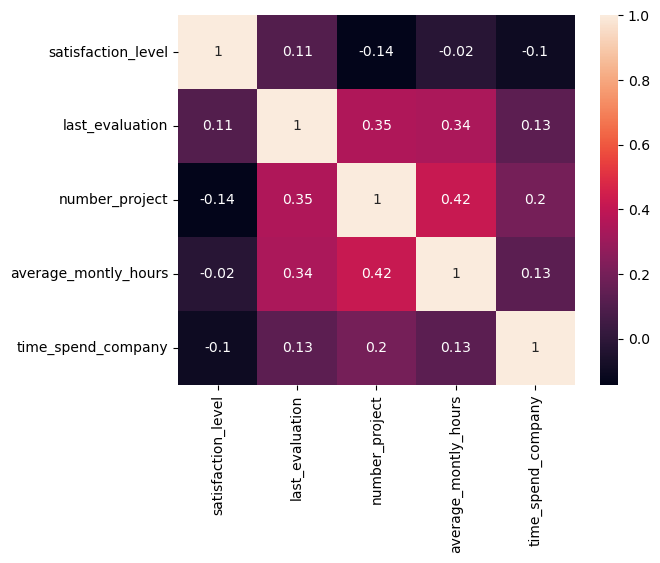

In [149]:
sns.heatmap(df.iloc[:, :5].corr('pearson'), annot=True)

In [150]:
from sklearn import preprocessing
from sklearn.compose import make_column_transformer

In [151]:
ohe = preprocessing.OneHotEncoder()
transformer = make_column_transformer((preprocessing.OneHotEncoder(), ['work_accident', 'promotion_last_5years']),
                                      remainder='passthrough')
 
transformed = transformer.fit_transform(df.loc[:, ['satisfaction_level', 
                                                   'last_evaluation', 
                                                   'number_project',
                                                   'average_montly_hours', 
                                                   'time_spend_company', 
                                                   'work_accident',
                                                   'promotion_last_5years']])
transformed_df = pd.DataFrame(
    transformed, columns=transformer.get_feature_names_out()
)
transformed_df

,onehotencoder__work_accident_0,onehotencoder__work_accident_1,onehotencoder__promotion_last_5years_0,onehotencoder__promotion_last_5years_1,remainder__satisfaction_level,remainder__last_evaluation,remainder__number_project,remainder__average_montly_hours,remainder__time_spend_company
0,1.0,0.0,1.0,0.0,0.38,0.53,2.0,157.0,3.0
1,1.0,0.0,1.0,0.0,0.80,0.86,5.0,262.0,6.0
2,1.0,0.0,1.0,0.0,0.11,0.88,7.0,272.0,4.0
3,1.0,0.0,1.0,0.0,0.72,0.87,5.0,223.0,5.0
4,1.0,0.0,1.0,0.0,0.37,0.52,2.0,159.0,3.0
...,...,...,...,...,...,...,...,...,...
14994,1.0,0.0,1.0,0.0,0.40,0.57,2.0,151.0,3.0
14995,1.0,0.0,1.0,0.0,0.37,0.48,2.0,160.0,3.0
14996,1.0,0.0,1.0,0.0,0.37,0.53,2.0,143.0,3.0
14997,1.0,0.0,1.0,0.0,0.11,0.96,6.0,280.0,4.0


In [152]:
X = transformed_df
y = df['left']

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

1. протестируем работу модели без предобработки предикторов

In [154]:
#обучаем модель и прогнозируем уход 
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
lda.predict(X_test)

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [155]:
pd.DataFrame(
    [list(y_test), lda.predict(X_test)]
)

,0,1,2,3,4,5,6,7,8,9,...,4490,4491,4492,4493,4494,4495,4496,4497,4498,4499
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0,0,0


In [156]:
lda.coef_

array([[ 5.39703506e-01, -5.39703506e-01,  5.06351969e-01,
        -5.06351969e-01, -4.54934900e+00,  6.05357398e-01,
        -2.45688995e-01,  4.44206181e-03,  2.29960414e-01]])

In [232]:
def model_testing(x_data: pd.DataFrame, y_data: pd.DataFrame, model: LinearDiscriminantAnalysis):
    print(f'accuracy_score = {metrics.accuracy_score(y_data, model.predict(x_data))}')
    print(f'prescision_score = {metrics.precision_score(y_data, model.predict(x_data))}')
    print(f'racall_score = {metrics.recall_score(y_data, model.predict(x_data))}')
    print(f'f1_score = {metrics.f1_score(y_data, model.predict(x_data))}')

In [233]:
model_testing(X_test, y_test, lda)

accuracy_score = 0.76
prescision_score = 0.4921190893169877
racall_score = 0.2623716153127918
f1_score = 0.34226552984165654


так как у нас не соблюден баланс классов, не обращаем внимания на метрику accuracy, результаты получились не очень хорошие, поэтому попробуем преобразовать данные

In [158]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

посмотрим детальнее на взаимодействие предикторов, чтобы исключить предикторы, влияющие на модель

In [164]:
vif_df = pd.read_csv(url)
Z = vif_df[['satisfaction_level',
            'last_evaluation',
            'number_project',
            'average_montly_hours',
            'time_spend_company', 
            'promotion_last_5years',
            'Work_accident']]
new_df = pd.DataFrame()
new_df['feature'] = Z.columns
new_df['vif'] = [variance_inflation_factor(Z.values, i) for i in range(len(Z.columns))]

new_df

,feature,vif
0,satisfaction_level,6.186601
1,last_evaluation,19.990183
2,number_project,13.793659
3,average_montly_hours,18.918397
4,time_spend_company,6.550547
5,promotion_last_5years,1.029476
6,Work_accident,1.172189


In [171]:
test_df = vif_df[['satisfaction_level',            
            'number_project',           
            'time_spend_company', 
            'promotion_last_5years',
            'Work_accident']]
new_df = pd.DataFrame()
new_df['feature'] = test_df.columns
new_df['vif'] = [variance_inflation_factor(test_df.values, i) for i in range(len(test_df.columns))]
new_df

,feature,vif
0,satisfaction_level,4.371670
1,number_project,6.755495
2,time_spend_company,5.818672
3,promotion_last_5years,1.029006
4,Work_accident,1.171911


оставим данный состав предикторов для нового теста модели, мы исключили столбцы last_evaluation и average_montly_hours, фактически подсвечивающие билзкую по смыслу информацию со столбцом number_project

In [197]:
X_new = transformed_df[['onehotencoder__work_accident_0',
                        'onehotencoder__work_accident_1',
                        'onehotencoder__promotion_last_5years_0',
                        'onehotencoder__promotion_last_5years_1',
                        'remainder__satisfaction_level',
                        'remainder__number_project',
                        'remainder__time_spend_company']]

In [198]:
X_2_train, X_2_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, stratify= y, random_state=42)

In [199]:
lda_2 = LinearDiscriminantAnalysis()
lda_2.fit(X_2_train, y_train)
lda_2.predict(X_2_test)

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [200]:
result_2 = pd.DataFrame(
    [list(y_test), lda_2.predict(X_2_test)],
)
result_2

,0,1,2,3,4,5,6,7,8,9,...,4490,4491,4492,4493,4494,4495,4496,4497,4498,4499
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0,0,0


In [202]:
X_2_test

,onehotencoder__work_accident_0,onehotencoder__work_accident_1,onehotencoder__promotion_last_5years_0,onehotencoder__promotion_last_5years_1,remainder__satisfaction_level,remainder__number_project,remainder__time_spend_company
3946,0.0,1.0,1.0,0.0,0.52,4.0,2.0
10652,1.0,0.0,1.0,0.0,0.19,4.0,6.0
5330,0.0,1.0,1.0,0.0,0.59,3.0,2.0
2669,1.0,0.0,1.0,0.0,0.33,5.0,4.0
10164,1.0,0.0,1.0,0.0,0.52,3.0,3.0
...,...,...,...,...,...,...,...
8919,1.0,0.0,1.0,0.0,0.62,3.0,3.0
9651,1.0,0.0,1.0,0.0,0.16,5.0,5.0
9137,1.0,0.0,1.0,0.0,0.69,4.0,4.0
14626,1.0,0.0,1.0,0.0,0.42,2.0,3.0


In [234]:
model_testing(X_2_test, y_test, lda_2)

accuracy_score = 0.7548888888888889
prescision_score = 0.47315436241610737
racall_score = 0.26330532212885155
f1_score = 0.33833233353329334


исключение признаков только ухудшило на работу модели, поэтому попробуем масштабировать данные данные

In [182]:
sc = StandardScaler()
X_3 = sc.fit_transform(X)

In [213]:
X_3

array([[ 0.41116529, -0.41116529,  0.14741182, ..., -1.46286291,
        -0.88203988, -0.34123516],
       [ 0.41116529, -0.41116529,  0.14741182, ...,  0.97111292,
         1.22042276,  1.71343614],
       [ 0.41116529, -0.41116529,  0.14741182, ...,  2.59376348,
         1.4206573 ,  0.34365527],
       ...,
       [ 0.41116529, -0.41116529,  0.14741182, ..., -1.46286291,
        -1.16236823, -0.34123516],
       [ 0.41116529, -0.41116529,  0.14741182, ...,  1.7824382 ,
         1.58084493,  0.34365527],
       [ 0.41116529, -0.41116529,  0.14741182, ..., -1.46286291,
        -0.86201642, -0.34123516]])

In [209]:
X_3_train, X_3_test, y_train, y_test = train_test_split(X_3, y, test_size=0.3, stratify=y, random_state=42)

In [210]:
lda_3 = LinearDiscriminantAnalysis()
lda_3.fit(X_3_train, y_train)
lda_3.predict(X_3_test)

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [235]:
model_testing(X_3_test, y_test, lda_3)

accuracy_score = 0.76
prescision_score = 0.4921190893169877
racall_score = 0.2623716153127918
f1_score = 0.34226552984165654


попробуем нормализовать данные

In [214]:
X_4 = preprocessing.normalize(X)

In [215]:
X_4_train, X_4_test, y_train, y_test = train_test_split(X_4, y, test_size=0.3, stratify=y, random_state=42)

In [216]:
lda_4 = LinearDiscriminantAnalysis()
lda_4.fit(X_4_train, y_train)
lda_4.predict(X_4_test)

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

In [236]:
model_testing(X_4_test, y_test, lda_4)

accuracy_score = 0.8233333333333334
prescision_score = 0.6612149532710281
racall_score = 0.5284780578898226
f1_score = 0.5874416190970422


результаты работы модели улучшились достаточно заметно с 47, 26 и 34 до 66, 52 и 58 

попробуем еще варианты масштабирования данных MinMaxScaler и RobustScaler

In [223]:
X_5 = preprocessing.MinMaxScaler().fit_transform(X)

In [224]:
X_5_train, X_5_test, y_train, y_test = train_test_split(X_5, y, test_size=0.3, stratify=y, random_state=42)

In [225]:
lda_5 = LinearDiscriminantAnalysis()
lda_5.fit(X_5_train, y_train)
lda_5.predict(X_5_test)

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [237]:
model_testing(X_5_test, y_test, lda_5)

accuracy_score = 0.76
prescision_score = 0.4921190893169877
racall_score = 0.2623716153127918
f1_score = 0.34226552984165654


показатели работы модели ухудшились

In [227]:
X_6 = preprocessing.RobustScaler().fit_transform(X)

In [228]:
X_6_train, X_6_test, y_train, y_test = train_test_split(X_6, y, test_size=0.3, stratify=y, random_state=42)

In [229]:
lda_6 = LinearDiscriminantAnalysis()
lda_6.fit(X_6_train, y_train)
lda_6.predict(X_6_test)

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [238]:
model_testing(X_6_test, y_test, lda_6)

accuracy_score = 0.76
prescision_score = 0.4921190893169877
racall_score = 0.2623716153127918
f1_score = 0.34226552984165654


лучшую работу показала модель LDA с нормализованными данными

In [239]:
model_testing(X_4_test, y_test, lda_4)

accuracy_score = 0.8233333333333334
prescision_score = 0.6612149532710281
racall_score = 0.5284780578898226
f1_score = 0.5874416190970422
